# **Matrix Inversion and Eigenvalue Problem.** Iterative Method, LU factorization, Power method, Jacobi’s method, Given’s Method, House-Holder’s Method.

1. Iterative Method

Working principle:
Iterative Method of Matrix Inversion involves an approximate estimate of the inverse matrix using the initial matrix B, which is an approximation to 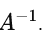. The error is calculated as E = AB - I, and the accuracy is improved iteratively.

Implementation 1: Iterative method with initial approximation

In [2]:
import numpy as np

def iterative_inverse(A, B, tol, max_iter):
    """Iterative method for finding the inverse matrix."""
    n = A.shape[0]
    I = np.eye(n)  # Unit matrix
    for _ in range(max_iter):
        E = np.dot(A, B) - I  # Calculating the error
        B_new = B - np.dot(B, E)  # Proximity update
        # Checking if we have achieved accuracy
        if np.linalg.norm(E, ord='fro') < tol:
            return B_new
        B = B_new
    return B_new

# Given matrix
A = np.array([[1, 10, 1], [2, 0, 1], [3, 3, 2]], dtype=float)
# Initial approximation
B = np.linalg.inv(A) + 0.1 * np.random.randn(3, 3)  # Noisy initial approximation

# Iterative process
A_inv = iterative_inverse(A, B, tol=1e-6, max_iter=100)
print("Inverse matrix (iteratively):")
print(A_inv)

# Check
print("Check: A * A_inv ≈ I")
print(np.dot(A, A_inv))

Inverse matrix (iteratively):
[[ 0.42857143  2.42857143 -1.42857143]
 [ 0.14285714  0.14285714 -0.14285714]
 [-0.85714286 -3.85714286  2.85714286]]
Check: A * A_inv ≈ I
[[ 1.00000000e+00  1.77635684e-15  0.00000000e+00]
 [-2.22044605e-16  1.00000000e+00  4.44089210e-16]
 [ 0.00000000e+00  8.88178420e-16  1.00000000e+00]]


1. Initial guess B adds a small error to the exact inverse matrix.
2. At each step, the error E=AB−I is calculated.
3. New guess for 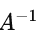: Bnew=B−BE.
4. Iterations continue until the error norm E is less than a given threshold (10^−6).

2. LU Factorization

How it works: LU factorization represents a square matrix A as a product of two matrices:

A=LU

where L is a lower triangular matrix with ones on the main diagonal, and U is an upper triangular matrix. This is useful for solving systems of linear equations and matrix inversion.

In [10]:
def lu_factorization(A):
    """LU factorization of a matrix."""
    n = A.shape[0]
    L = np.eye(n)  # Lower triangular matrix
    U = A.copy()  # Upper triangular matrix

    for i in range(n):
        for j in range(i+1, n):
            factor = U[j, i] / U[i, i]
            L[j, i] = factor
            U[j, i:] -= factor * U[i, i:]

    return L, U

def solve_lu(L, U, b):
    """Solving the system using LU decomposition."""
    # Straight move for Ly = b
    n = L.shape[0]
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])

    # Reverse move for Ux = y
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]

    return x

# Example of a matrix and right-hand side
A = np.array([[4, -1, 0], [-1, 4, -1], [0, -1, 4]], dtype=float)
b = np.array([15, 10, 10], dtype=float)

# LU-factorization
L, U = lu_factorization(A)
print("Lower triangular matrix L:")
print(L)
print("Upper triangular matrix U:")
print(U)

# Solution of the system
x = solve_lu(L, U, b)
print("Solution of Ax = b:")
print(x)

# Check
check = np.dot(A, x)
print("Check: A * x ≈ b")
print(check)

Lower triangular matrix L:
[[ 1.          0.          0.        ]
 [-0.25        1.          0.        ]
 [ 0.         -0.26666667  1.        ]]
Upper triangular matrix U:
[[ 4.         -1.          0.        ]
 [ 0.          3.75       -1.        ]
 [ 0.          0.          3.73333333]]
Solution of Ax = b:
[4.91071429 4.64285714 3.66071429]
Check: A * x ≈ b
[15. 10. 10.]


1. The matrix A is decomposed into L and U.
2. The system Ax=b is transformed into two: Ly=b and Ux=y.
3. The solution is carried out in two stages: the forward move (calculating y) and the backward move (calculating x).
4. The LU decomposition is effective for multiple solutions of systems with the same matrix but different right-hand sides.

3. Power Method

How it works: The power method is used to find the largest eigenvalue and the corresponding eigenvector of the matrix A. It starts with an initial vector v0​, which is iteratively updated until convergence.

In [9]:
def power_method(A, v0, tol, max_iter):
    """Power iteration method for the largest eigenvalue."""
    v = v0 / np.linalg.norm(v0)  # Normalization of the initial vector
    for _ in range(max_iter):
        w = np.dot(A, v)  # Matrix-vector multiplication
        lambda_new = np.dot(w, v)  # Eigenvalue approximation
        v_new = w / np.linalg.norm(w)  # Normalization of the new vector

        # Convergence check
        if np.linalg.norm(v_new - v) < tol:
            return lambda_new, v_new

        v = v_new
    return lambda_new, v_new

# Example matrix
A = np.array([[4, 1], [2, 3]], dtype=float)
v0 = np.array([1, 1], dtype=float)

# Finding the eigenvalue and vector
lambda_max, eigenvector = power_method(A, v0, tol=1e-6, max_iter=100)
print("Largest eigenvalue:")
print(np.round(lambda_max))
print("The corresponding eigenvector:")
print(eigenvector)

Largest eigenvalue:
5.0
The corresponding eigenvector:
[0.70710678 0.70710678]


1. Initially, an arbitrary initial vector v0 is specified, which is normalized.
2. Iterations: multiplying the matrix A by the current vector v, normalizing the result.
3. The eigenvalue approximation is calculated as 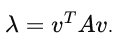
4. Convergence is achieved when the difference between the vectors vnew and v becomes less than the specified accuracy.

4. Jacobi Method for Finding All Eigenvalues

How it works: Jacobi Method uses orthogonal transformations to diagonalize a symmetric matrix. The elements on the diagonal of the transformed matrix are the eigenvalues.

In [8]:
#np.seterr(divide='ignore', invalid='ignore')
def jacobi_eigenvalues(A, tol, max_iter):
    """Jacobi's method for finding all eigenvalues."""
    n = A.shape[0]
    V = np.eye(n)
    for _ in range(max_iter):
        # Find the maximum off-diagonal element
        max_val = 0
        for i in range(n):
            for j in range(i+1, n):
                if abs(A[i, j]) > abs(max_val):
                    max_val = A[i, j]
                    p, q = i, j

        if abs(max_val) < tol:
            break

        # Calculating rotation parameters
        theta = 0.5 * np.arctan(2 * A[p, q] / (A[p, p] - A[q, q]))
        cos = np.cos(theta)
        sin = np.sin(theta)

        # We apply the Jacobi transformation
        R = np.eye(n)
        R[p, p] = R[q, q] = cos
        R[p, q] = sin
        R[q, p] = -sin
        A = R.T @ A @ R
        V = V @ R

    eigenvalues = np.diag(A)
    return eigenvalues, V

# Example of a symmetric matrix
A = np.array([[5, 0, 1], [0, -2, 0], [1, 0, 5]], dtype=float)

# Finding eigenvalues ​​and eigenvectors
eigenvalues, eigenvectors = jacobi_eigenvalues(A, tol=1e-6, max_iter=100)
print("Eigenvalues:")
print(eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[ 4. -2.  6.]
Eigenvectors:
[[ 0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]
 [-0.70710678  0.          0.70710678]]


<ipython-input-8-765570f69ade>:19: RuntimeWarning: divide by zero encountered in scalar divide
  theta = 0.5 * np.arctan(2 * A[p, q] / (A[p, p] - A[q, q]))


1. At each step, the method finds the maximum off-diagonal element of the matrix.
2. The Jacobi rotation is applied, which reduces the off-diagonal elements.
3. The iterations continue until the off-diagonal elements become less than the specified accuracy.

5. Givens Method

How it works: Givens' method is used to reduce a symmetric matrix A to tridiagonal form. This is achieved by successive application of Givens' orthogonal transformations, which set elements outside adjacent diagonals to zero.

In [11]:
def givens_rotation(A):
    """QR decomposition by Givens method."""
    m, n = A.shape
    Q = np.eye(m)  # Orthogonal matrix
    R = A.copy()

    for i in range(n):
        for j in range(i+1, m):
            if R[j, i] != 0:
                r = np.hypot(R[i, i], R[j, i])
                cos = R[i, i] / r
                sin = -R[j, i] / r

                G = np.eye(m)  # Givens rotation matrix
                G[i, i] = cos
                G[j, j] = cos
                G[i, j] = -sin
                G[j, i] = sin

                R = G @ R  # Transform R
                Q = Q @ G.T  # Accumulation of Q

    return Q, R

# Example
A = np.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]], dtype=float)

# QR decomposition
Q, R = givens_rotation(A)
print("Matrix Q:")
print(Q)
print("Matrix R:")
print(R)

# Check
print("Check: A ≈ QR")
print(Q @ R)


Matrix Q:
[[ 0.85714286 -0.39428571  0.33142857]
 [ 0.42857143  0.90285714 -0.03428571]
 [-0.28571429  0.17142857  0.94285714]]
Matrix R:
[[ 1.40000000e+01  2.10000000e+01 -1.40000000e+01]
 [-2.18463005e-16  1.75000000e+02 -7.00000000e+01]
 [ 3.97205465e-17  3.11650577e-15 -3.50000000e+01]]
Check: A ≈ QR
[[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]


1. For each pair of rows (i, j), apply Givens rotation to zero out the element R[j,i].
2. Matrix G is an orthogonal rotation matrix.
3. Iterations continue until R is upper triangular.

In [12]:
import numpy as np

def givens_tridiagonal(A):
    """Givens' method for reducing a symmetric matrix to tridiagonal form."""
    n = A.shape[0]
    for i in range(n-2):
        for j in range(i+2, n):
            if A[j, i] != 0:
                r = np.hypot(A[i+1, i], A[j, i])  # Standardization
                c = A[i+1, i] / r
                s = -A[j, i] / r

                # Givens rotation matrix
                G = np.eye(n)
                G[i+1, i+1] = G[j, j] = c
                G[j, i+1] = s
                G[i+1, j] = -s

                # Updating the matrix A
                A = G.T @ A @ G  # Transformation of a symmetric matrix

    return A

# Original symmetric matrix
A = np.array([[1, 2, 2],
              [2, 1, 2],
              [2, 2, 1]], dtype=float)

# Reduction to tridiagonal form
T = givens_tridiagonal(A)
print("Tridiagonal matrix:")
print(T)


Tridiagonal matrix:
[[ 1.00000000e+00  0.00000000e+00  2.82842712e+00]
 [ 0.00000000e+00 -1.00000000e+00  2.23711432e-17]
 [ 2.82842712e+00  4.39088730e-17  3.00000000e+00]]


1. The goal of Givens' method is to zero out the elements off the main and adjacent diagonals of the matrix to obtain a tridiagonal form.
2. The matrix G is a rotation that affects only two columns and rows.
3. Givens transformations preserve the symmetry of the matrix.

6. Householder's Method

How it works: Householder's Method is used to triangulate a matrix or to find eigenvalues. It constructs orthogonal transformations based on Householder vectors that zero out all elements below the pivot element in a column.

In [13]:
def householder_qr(A):
    """QR decomposition by Householder method."""
    m, n = A.shape
    R = A.copy()
    Q = np.eye(m)

    for i in range(n):
        # Create a Householder vector
        x = R[i:, i]
        e = np.zeros_like(x)
        e[0] = np.linalg.norm(x)
        v = x - e
        v = v / np.linalg.norm(v)

        # Householder Matrix
        H = np.eye(m)
        H[i:, i:] -= 2.0 * np.outer(v, v)

        # Transformation of R and accumulation of Q
        R = H @ R
        Q = Q @ H.T

    return Q, R

# Example
A = np.array([[12, -51, 4], [6, 167, -68], [-4, 24, -41]], dtype=float)

# QR decomposition
Q, R = householder_qr(A)
print("Matrix Q:")
print(Q)
print("Matrix R:")
print(R)

# Check
print("Check: A ≈ QR")
print(Q @ R)

Matrix Q:
[[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]]
Matrix R:
[[ 1.40000000e+01  2.10000000e+01 -1.40000000e+01]
 [ 5.50670620e-16  1.75000000e+02 -7.00000000e+01]
 [ 3.01980663e-16  8.88178420e-15  3.50000000e+01]]
Check: A ≈ QR
[[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]


1. The method uses a vector vv that is formed to zero out all elements below the first in the current column.
2. The Householder matrix H: H=I−2vvTvTv
3. R becomes upper triangular and Q becomes orthogonal.

In [14]:
def householder_tridiagonal(A):
    """Householder's method for reducing a symmetric matrix to tridiagonal form."""
    n = A.shape[0]
    T = A.copy()
    for k in range(n-2):
        x = T[k+1:, k]
        e = np.zeros_like(x)
        e[0] = np.linalg.norm(x)
        v = x - e
        v = v / np.linalg.norm(v)

        # Householder Matrix
        H = np.eye(n)
        H[k+1:, k+1:] -= 2.0 * np.outer(v, v)

        # Apply the transformation to T
        T = H @ T @ H.T
    return T

# Example
A = np.array([[1, 1, 0.5], [1, 1, 0.25], [0.5, 0.25, 2]], dtype=float)

# Reduction to tridiagonal form
T = householder_tridiagonal(A)
print("Tridiagonal matrix:")
print(T)

Tridiagonal matrix:
[[ 1.00000000e+00  1.11803399e+00  2.77555756e-16]
 [ 1.11803399e+00  1.40000000e+00 -5.50000000e-01]
 [ 2.77555756e-16 -5.50000000e-01  1.60000000e+00]]


1. Householder's method uses vectors v to construct reflection matrices H that zero out elements below adjacent diagonals.
2. Unlike Givens's, Householder's method is more efficient for dense matrices because it operates on entire columns.